In [1]:
# Importing the required packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
data = pd.read_csv('honeyproduction.csv')

In [3]:
# Viewing the dataset
data.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [4]:
# Setting a custom color palette to use
colors = ["pink", "lightpink","red","white"]
customPalette = sns.set_palette(sns.color_palette(colors))

___
# -> Observations:
#### 1. numcol: The total number of honey producing colonies. Honey producing colonies are the maximum number of colonies from which honey was taken during the year. It is possible to take honey from colonies which did not survive the entire year.
#### 2. yieldpercol: It is the honey yield per colony. The unit taken is pounds as the data has been collected from the US states.
#### 3. totalprod: The total production (numcol x yieldpercol). The unit taken is pounds.
#### 4. stocks: It refers to stocks held by producers. The unit taken is pounds.
#### 5. priceperlb: It refers to average price per pound based on expanded sales. The unit taken is US dollars.
#### 6. prodvalue: It is the value of production (totalprod x priceperlb). The unit taken is US dollars.
#### 7. Other vital information: Certain states are excluded every year (eg. CT) to avoid disclosing data for individual operations. Due to rounding, total colonies multiplied by total yield may not equal production. Also, summation of states will not equal U.S. level value of production. We have later added the missing states with 0 value of production to increase uniformity.
#### 8. The dataset looks complete, consise, and ready for operations.
___

# ● Explore the quantitative variables and qualitative variables in the dataset
### 1) Exploration of quantitative variables

In [5]:
# Shape of the dataset
data.shape

(626, 8)

In [6]:
# Checking the different data types available in the dataset
data.dtypes

state           object
numcol         float64
yieldpercol      int64
totalprod      float64
stocks         float64
priceperlb     float64
prodvalue      float64
year             int64
dtype: object

In [7]:
# Displaying the numerical variables
data[["numcol","yieldpercol","totalprod","stocks","priceperlb","prodvalue","year"]]

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
...,...,...,...,...,...,...,...
621,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012


In [8]:
# Converting the years into categories
data.year = data.year.astype('category')

___
# -> Observations:
#### 1. We have 626 rows = no. of observations.
#### 2. The states mentioned are object data types.
#### 3. The years are currently integer type. But owing to the fact that a year is a categorical variable we have converted it into a category data type in python.
#### 4. The rest of the variables are numerical values of float64 and int64 type.

___

### 2) Exploration of qualitative variables

In [9]:
data.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
count,626.000000,626.000000,6.260000e+02,6.260000e+02,626.000000,6.260000e+02
mean,60284.345048,62.009585,4.169086e+06,1.318859e+06,1.409569,4.715741e+06
std,91077.087231,19.458754,6.883847e+06,2.272964e+06,0.638599,7.976110e+06
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05
25%,9000.000000,48.000000,4.750000e+05,1.430000e+05,0.932500,7.592500e+05
50%,26000.000000,60.000000,1.533000e+06,4.395000e+05,1.360000,1.841500e+06
75%,63750.000000,74.000000,4.175250e+06,1.489500e+06,1.680000,4.703250e+06
max,510000.000000,136.000000,4.641000e+07,1.380000e+07,4.150000,6.961500e+07


___
# -> Observations:
#### 1. The values of numcol, yeildpercol, and other variables have huge numerical values in the given dataset.
#### 2. The standard deviation of the numcol is vary high owing to the mean being close to almost 50% of the data.
___

# ● Find the relationship between numerical variables using pair plots and correlation plots. Explain what you infer from these plots.

In [10]:
# Correlation between the variables
cor = data[['numcol',
           'yieldpercol',
           'totalprod',
           'stocks',
           'priceperlb',
           'prodvalue']].corr()
cor

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
numcol,1.000000,0.243515,0.953594,0.825929,-0.232701,0.912796
yieldpercol,0.243515,1.000000,0.396252,0.367812,-0.358646,0.278977
totalprod,0.953594,0.396252,1.000000,0.878830,-0.264499,0.907236
stocks,0.825929,0.367812,0.878830,1.000000,-0.305867,0.728560
priceperlb,-0.232701,-0.358646,-0.264499,-0.305867,1.000000,-0.089567
prodvalue,0.912796,0.278977,0.907236,0.728560,-0.089567,1.000000


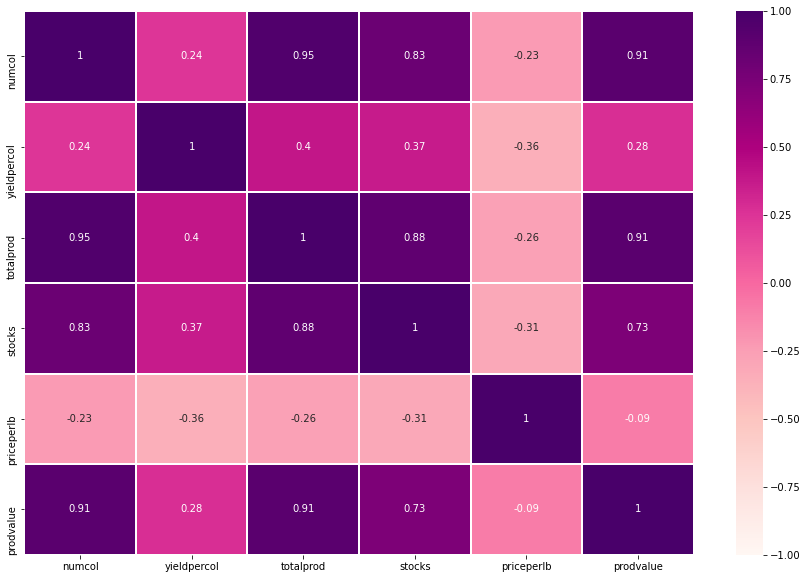

In [11]:
# Heatmap for 2D correlation plot
plt.figure(figsize=(15,10))
# help(sns.heatmap)
sns.heatmap(cor,annot = True,cmap='RdPu',vmin=-1,vmax=1,linewidth =1)
plt.savefig('Heatmap.png')

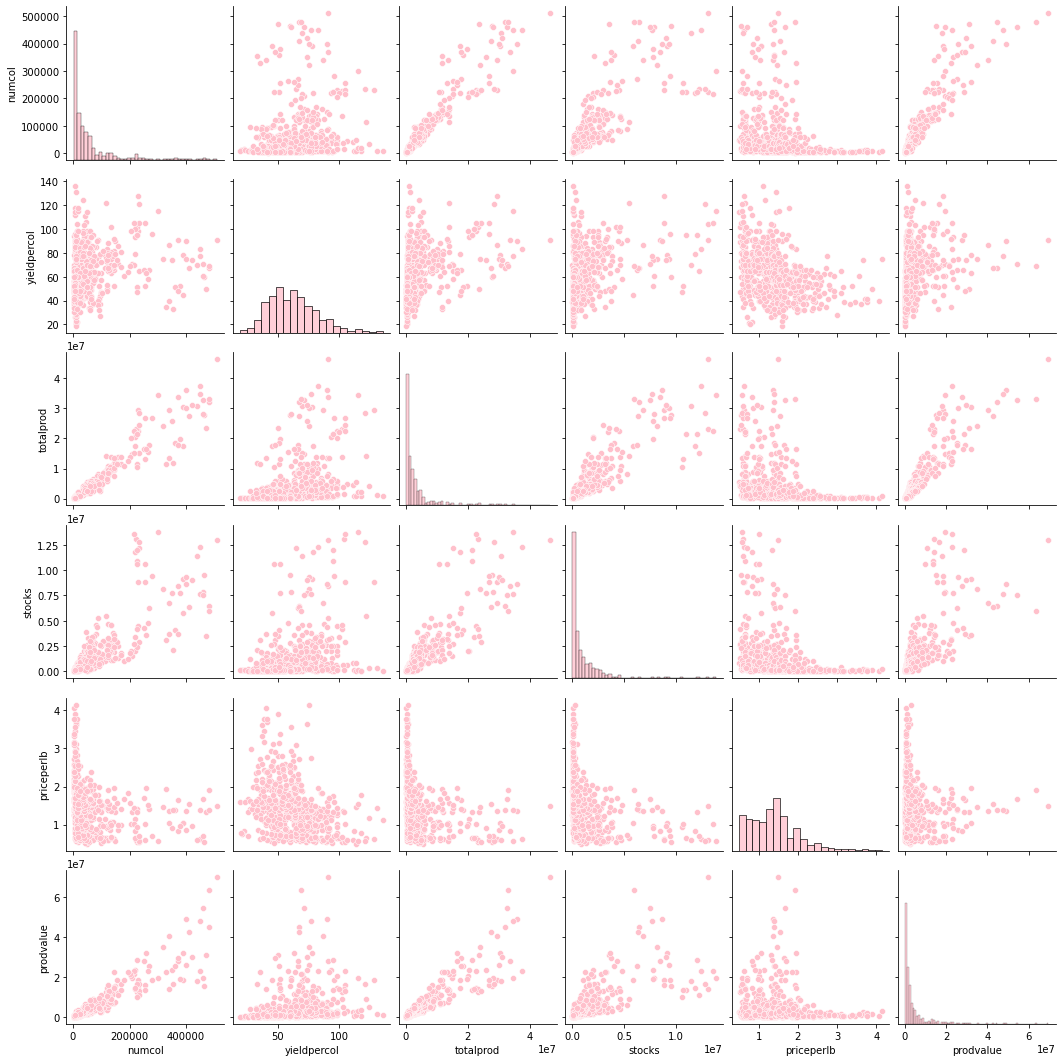

In [12]:
# Pairplots for the dataset
sns.pairplot(data.drop('year',axis=1))
plt.savefig('Pair plots.png')

___
# -> Observations:
#### 1. The number of colonies have a high positive correlation with stocks, total production, and the value of production owing to the fact that all these values are highly correlated amongst themselves.
#### 2. The yeild per colony and the other determining factors have failed to show much correlation with the price per pound of honey.
___

# ● Look at the overall trend of honey production in the US over the years

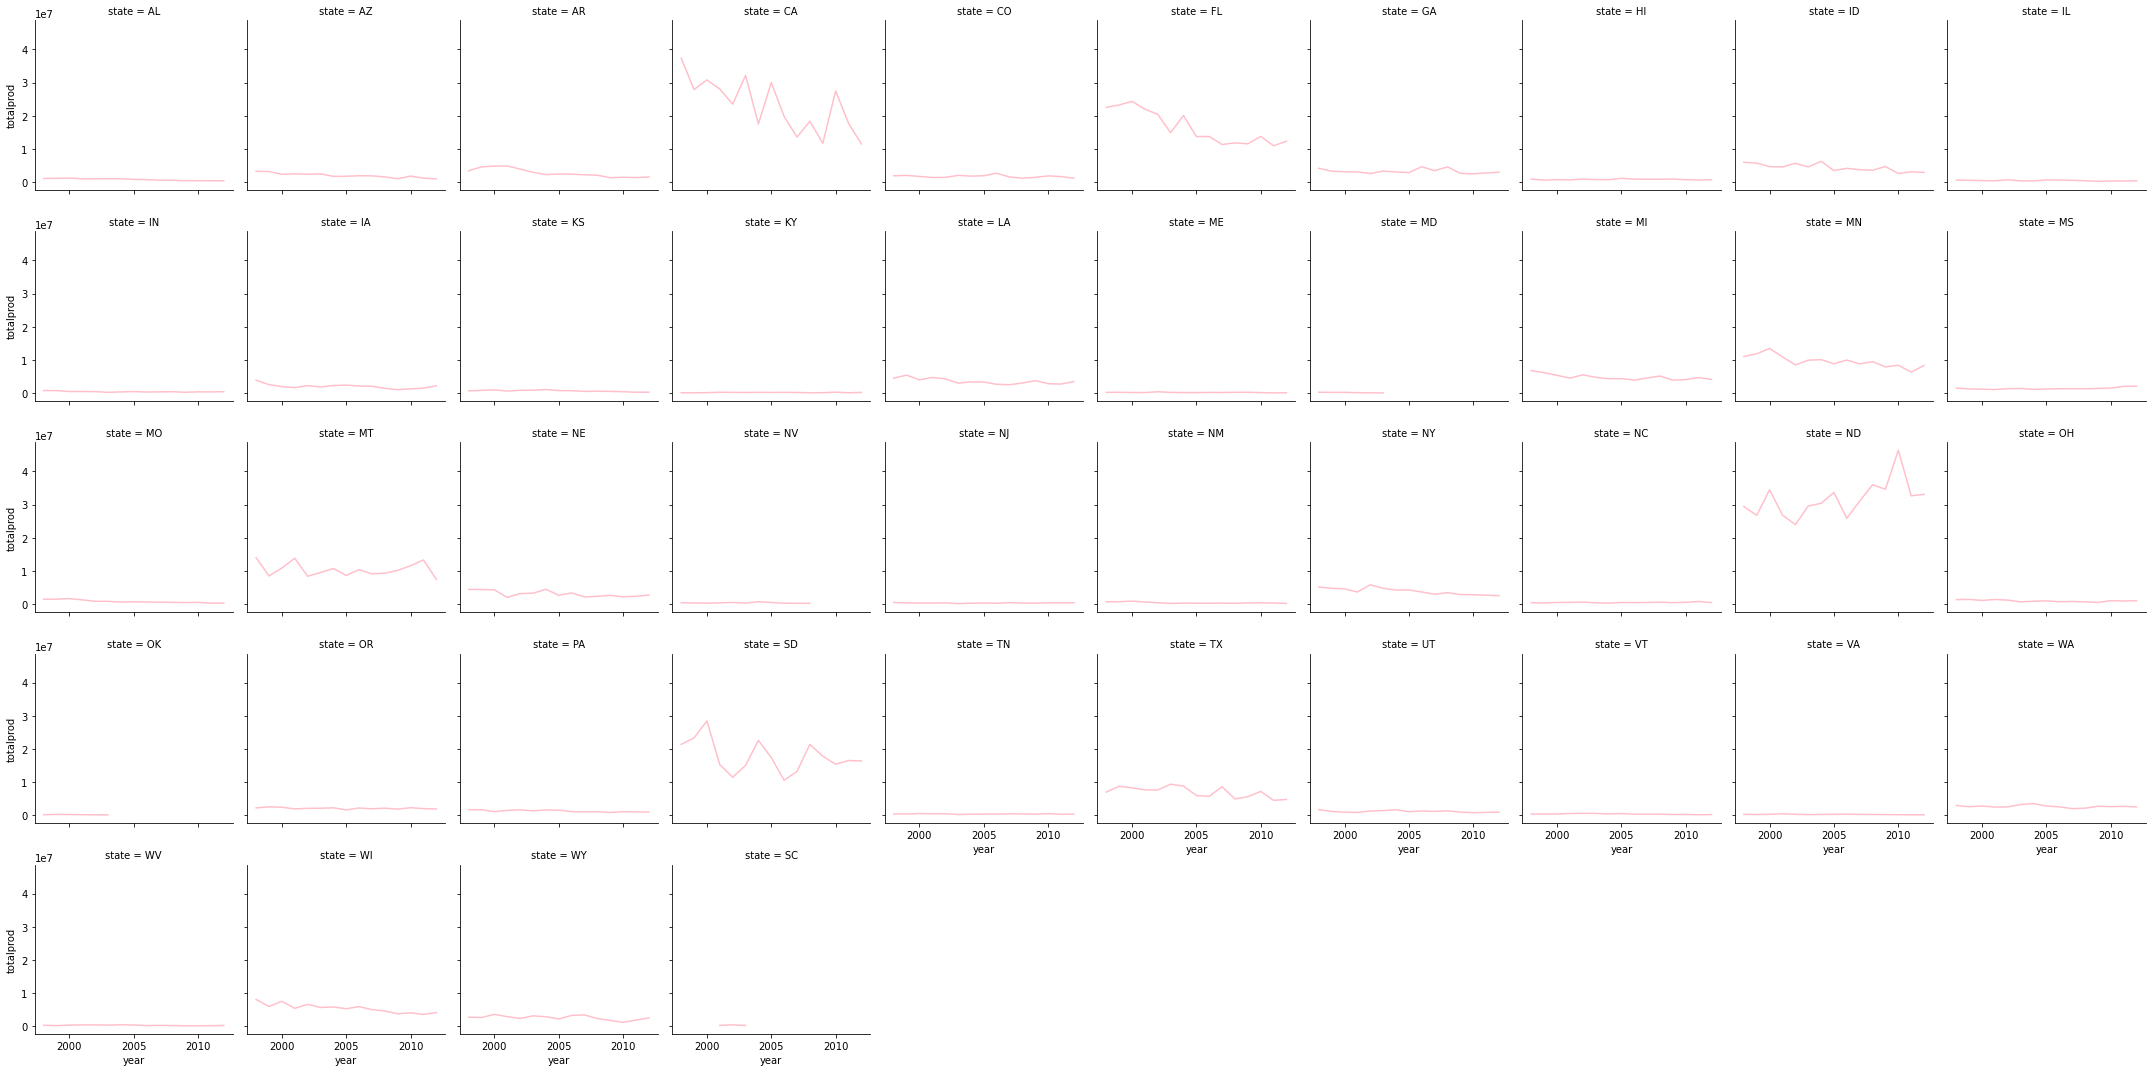

In [13]:
g= sns.FacetGrid(data,col='state',col_wrap=10,size=3)
g = g.map(plt.plot,'year','totalprod')
plt.savefig('Total production in each state.png')

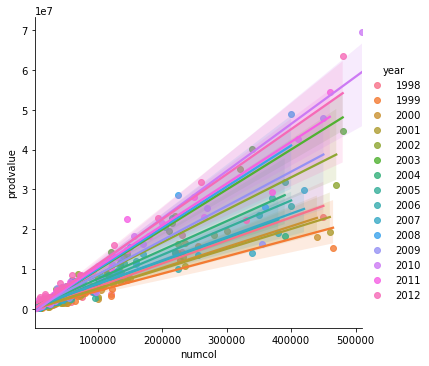

In [14]:
sns.lmplot(x='numcol',y='prodvalue',data=data,hue='year')
plt.savefig('Variation in the Production value w.r.t No. of colonies.png')

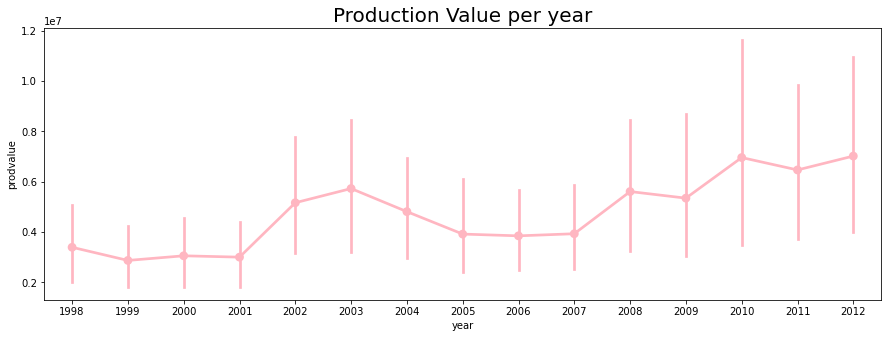

In [15]:
plt.figure(figsize=(15,5))
sns.pointplot('year','prodvalue',data = data, color = "lightpink")
plt.title("Production Value per year", size =20)
plt.savefig('Production Value per year.png')

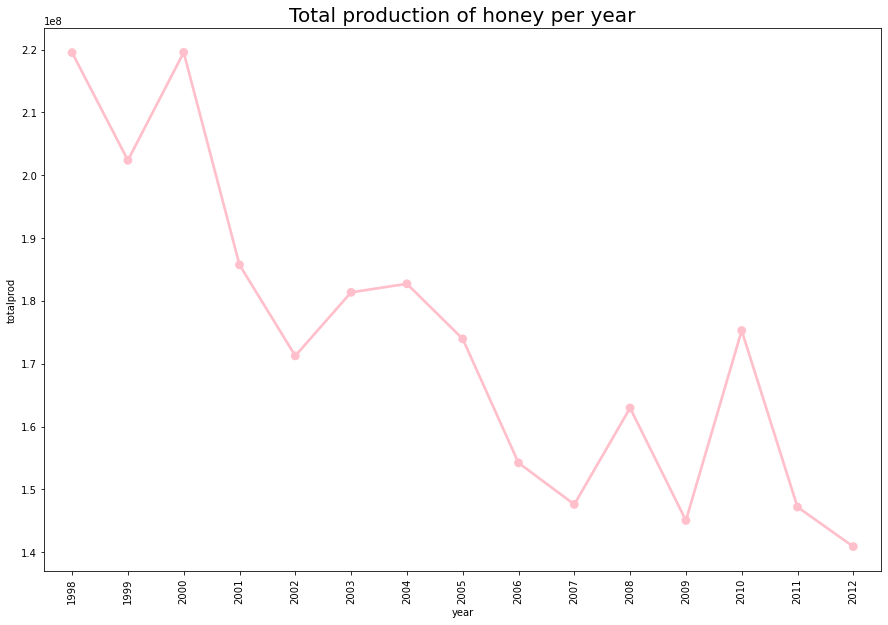

<Figure size 432x288 with 0 Axes>

In [16]:
plt.figure(figsize=(15, 10))
sns.pointplot(x='year', y='totalprod', data=data, estimator=sum, ci=None)
plt.xticks(rotation=90) # To rotate the x axis labls
plt.title("Total production of honey per year", size=20)
plt.show()
plt.savefig('Total production of honey per year.png')

___
# -> Observations:
#### 1. The overall production of honey in the US has been decreasing over the years.
#### 2. Despite the steady decline in the total production of honey, we can witness a clear rise in 2008 and 2009 which refers to an increase in the numcol over these years.
___

# ● Are there any patterns that can be observed between total honey production and value of production every year? How has value of production, which in some sense could be tied to demand, changed every year?

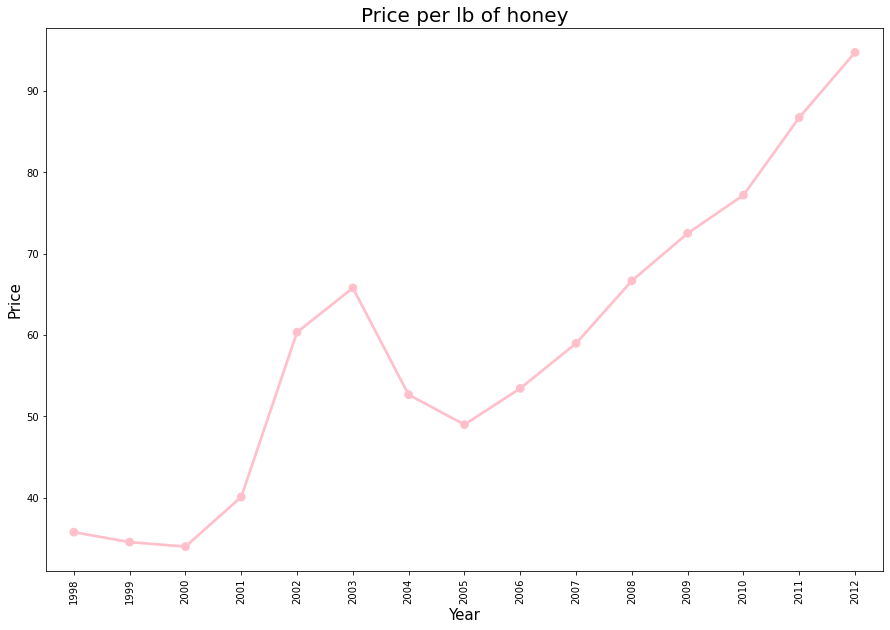

<Figure size 432x288 with 0 Axes>

In [17]:
# Line plot to show variation in price per lb per year as the demand remains constant but the production decreases.
plt.figure(figsize=(15, 10))
sns.pointplot(x='year', y='priceperlb', data=data, ci=None, estimator=sum)
plt.xticks(rotation=90) # To rotate the x axis labls
plt.title("Price per lb of honey", size=20)
plt.xlabel("Year", size = 15)
plt.ylabel("Price", size = 15)
plt.show()
plt.savefig('Price per lb of honey.png')

___
# -> Observations:
#### 1. It is visible that the production is decreasing year by year, if the demand is the same, the price will go up. This can be seen in the above graphic.
___


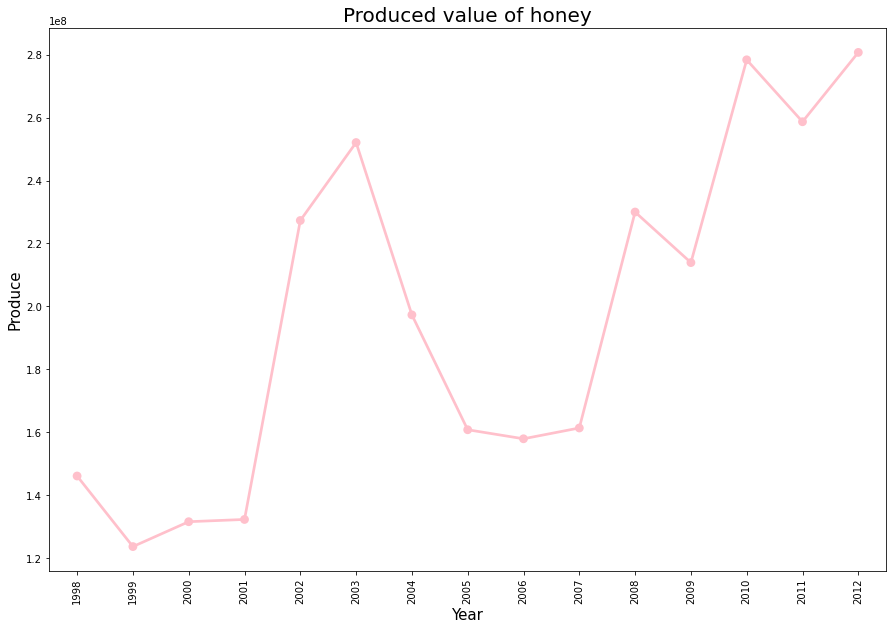

<Figure size 432x288 with 0 Axes>

In [18]:
# Line plot the amount of honey produced per year
plt.figure(figsize=(15, 10))
sns.pointplot(x='year', y='prodvalue', data=data, ci=None, estimator=sum)
plt.xticks(rotation=90) # To rotate the x axis labls
plt.title("Produced value of honey", size=20)
plt.xlabel("Year", size = 15)
plt.ylabel("Produce", size = 15)
plt.show()
plt.savefig('Produced value of honey.png')

___
# -> Observations:
#### 1. The produced value is tied with the Yield per colony and the price per lb. When there's a decrease in Yield, but a increse in price, the price will adjust. For example, take a look into the years 2001-2003 and 2003-2005-
#### From 2001-2003, there was a huge increase in value. We didn't see a significant decrease in Yield, but the price skyrocket!
#### From 2003-2005, the price decrease (not to the same level of 2001), as well as the yield, so the produced value decrease a lot.
#### 2. During the next years, a continous decrease of yield and a continuous increase in price per lb can be witnessed, but the tendency of the produced value is to always increase.
___

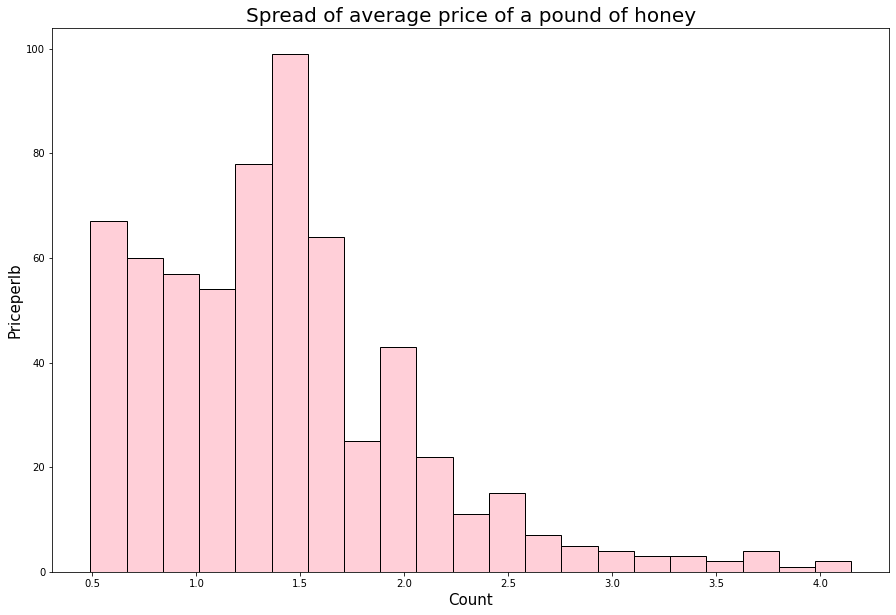

<Figure size 432x288 with 0 Axes>

In [19]:
#The spread of average price of a pound of honey
plt.figure(figsize=(15, 10))
plt.title("Spread of average price of a pound of honey",size=20)
plt.xlabel("Count",size=15)
plt.ylabel("Priceperlb",size=15)
sns.histplot(data.priceperlb)
plt.show()
plt.savefig('Spread of average price of a pound of honey.png')

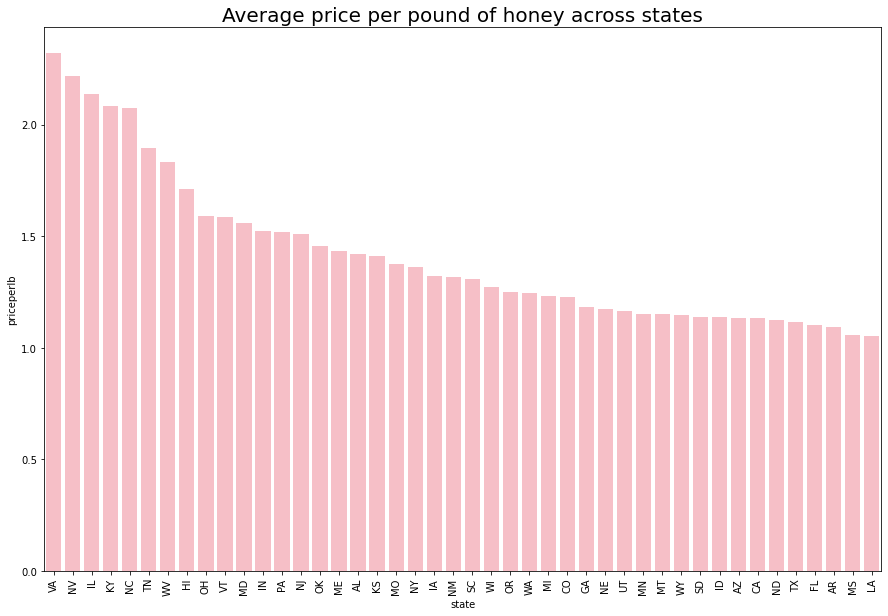

<Figure size 432x288 with 0 Axes>

In [20]:
#The average price per pound of honey across states
plt.figure(figsize=(15, 10))
plt.title("Average price per pound of honey across states",size=20)
sns.barplot(data = data, x = "state", y = "priceperlb", ci=None, color='lightpink', order=data.groupby('state').priceperlb.mean().sort_values(ascending = False).index)
plt.xticks(rotation=90) # To rotate the x axis lables
plt.show()
plt.savefig('Average price per pound of honey across states.png')


___
# -> Observations:
#### 1. Virginia has the highest price per pound of honey.
#### 2. The average price per pound of honey in the major honey producing states is towards the end in Los Angeles.
___

# ● Observe the Variation in the number of colonies over the years.

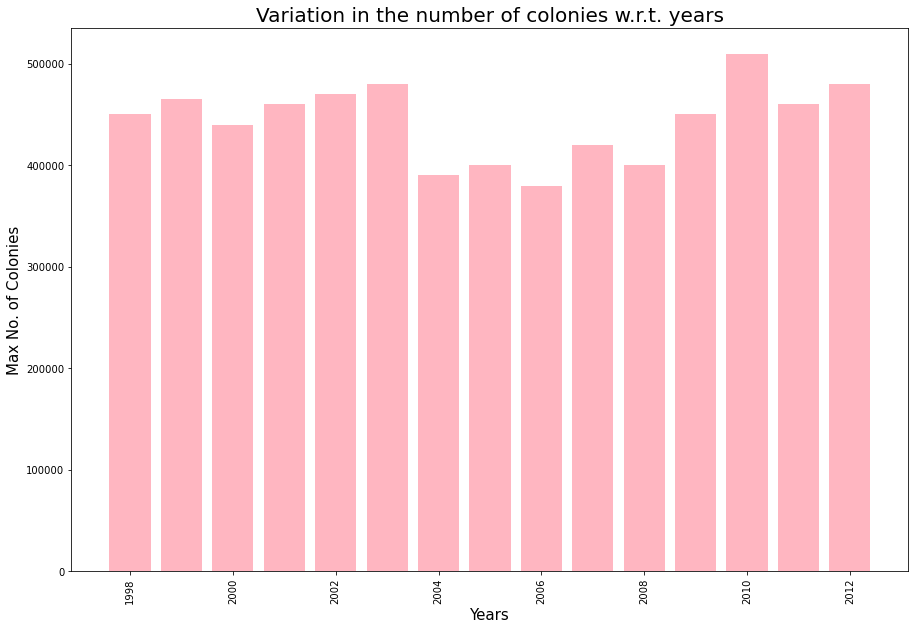

<Figure size 432x288 with 0 Axes>

In [21]:
# plt.bar(data['year'],data['numcol'])
plt.figure(figsize=(15,10))
plt.bar("year", "numcol", data = data, color = "lightpink")
plt.xlabel("Years",size=15)
plt.xticks(rotation = 90)
plt.ylabel("Max No. of Colonies",size=15)
plt.title("Variation in the number of colonies w.r.t. years",size=20)
plt.show()
plt.savefig('Variation in the number of colonies w.r.t. years.png')

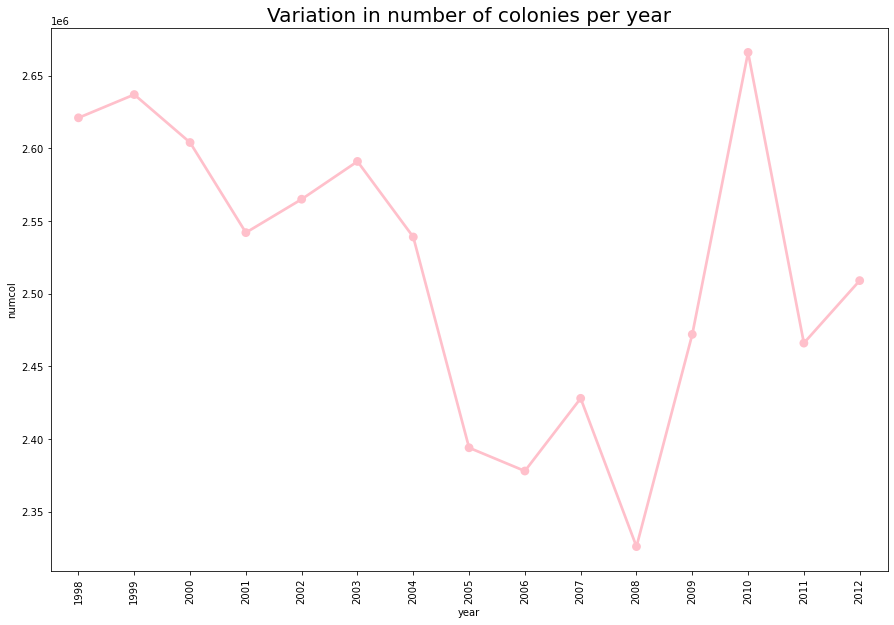

<Figure size 432x288 with 0 Axes>

In [22]:
# Variation in number of colonies per year
plt.figure(figsize=(15, 10))
sns.pointplot(x='year', y='numcol', data=data, ci=None, estimator=sum)
plt.xticks(rotation=90)
plt.title("Variation in number of colonies per year",size=20)
plt.show()
plt.savefig('Variation in number of colonies per year.png')

___
# -> Observations:
#### 1. The number of colonies across the country shows a declining trend from 1998-2008 but has seen an uprise since 2008.
#### 2. This might have been due to increase in the factors affecting the number of colonies.
___

# ● Analyze the variation of yeild per colony over the years and the production trend at state level; and brief out what you observed.

In [23]:
yield_ = data['yieldpercol'].groupby(by=data['year']).sum() 
yield_.head()

year
1998    3008
1999    2815
2000    2906
2001    2840
2002    2939
Name: yieldpercol, dtype: int64

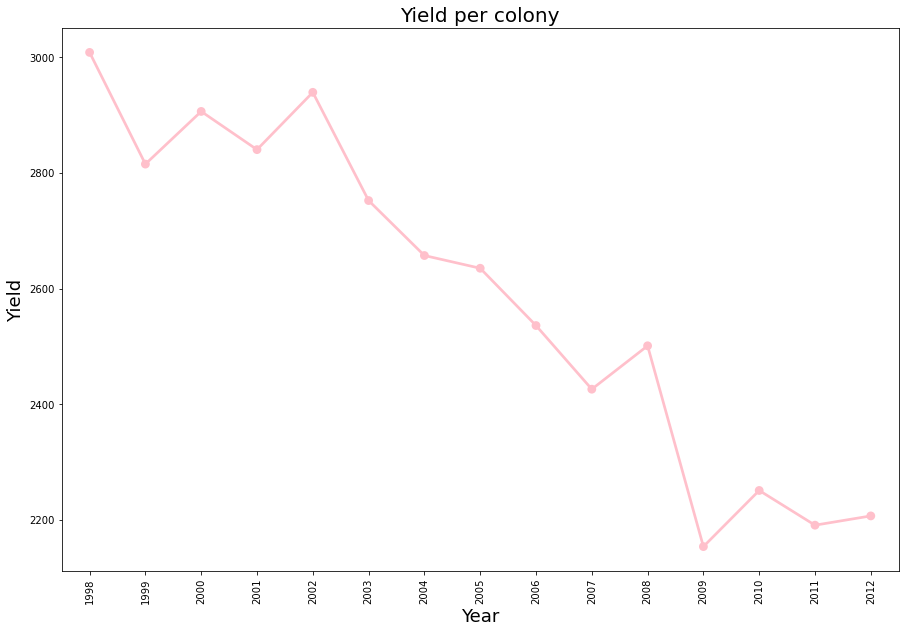

<Figure size 432x288 with 0 Axes>

In [24]:
# The yeild per colony over the years
plt.figure(figsize=(15,10))
sns.pointplot(x=yield_.index,y=yield_.values,label='Yield per colony',estimator=sum, ci=None)
plt.title("Yield per colony", size=20)
plt.xlabel("Year", size=18)
plt.ylabel("Yield", size = 18)
plt.xticks(rotation=90) #To rotate the x axis labels
plt.show()
plt.savefig('Yield per colony.png')

___
# -> Observations:
#### 1. The yield per colony has been decreasing since 1998 as compared to the number of colonies. This signifies that, it is not the number of colonies that is causing a decline in totalhoney production but the yield per colony.
___

In [25]:
state = data['totalprod'].groupby(by=data['state'], axis=0, sort=False).sum().sort_values(ascending=False)
state.head()

state
ND    475085000.0
CA    347535000.0
SD    266141000.0
FL    247048000.0
MT    156562000.0
Name: totalprod, dtype: float64

___
# -> Observations:
#### 1. Some states have higher production than the others. While some states even have zero production per year.
___

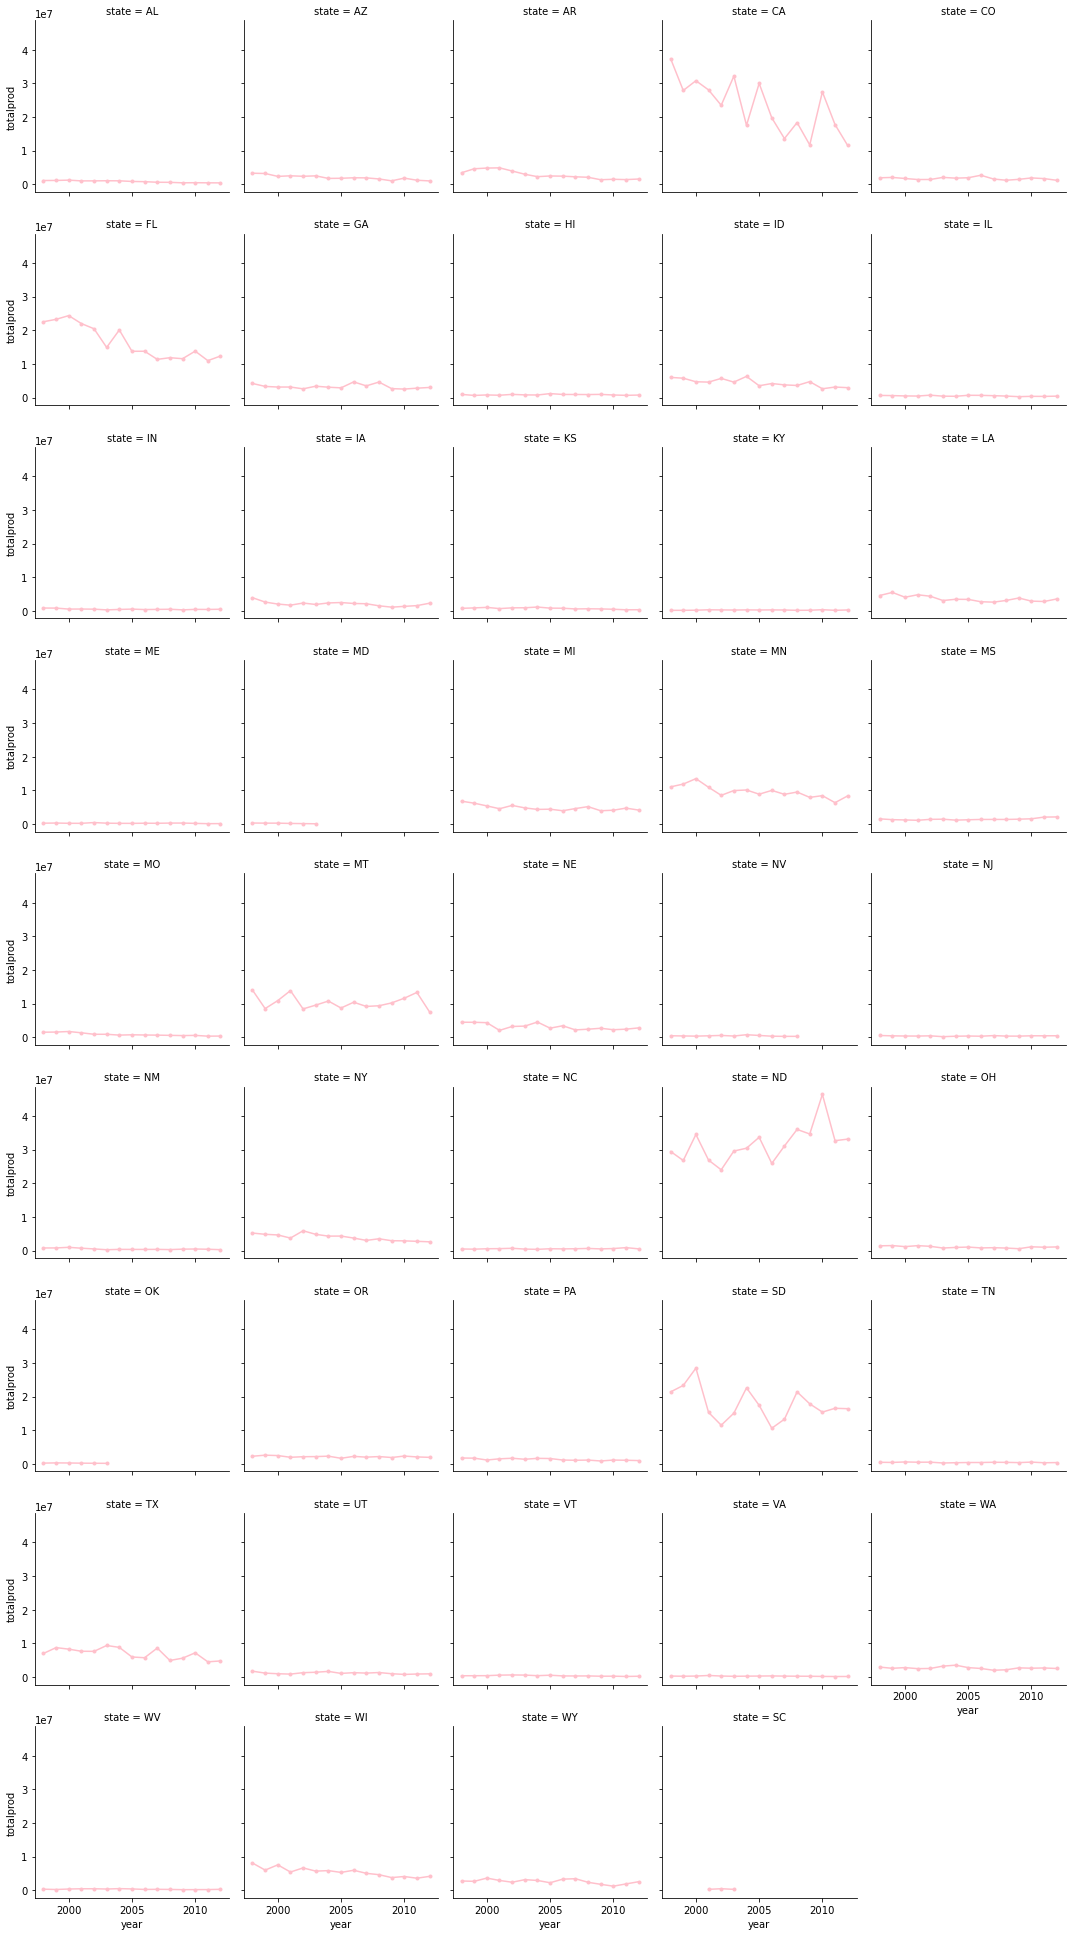

In [26]:
g = sns.FacetGrid(data, col="state", col_wrap=5, height=3)
g = g.map(plt.plot, "year", "totalprod", marker=".")
plt.savefig('Production trend at State level.png')

___
# -> Observations:
#### 1. The most honey producing states  are North Dakota, California, South Dakota...
#### 2. Some states have zero production due to internal reasons, and have not witnessed any change.
___

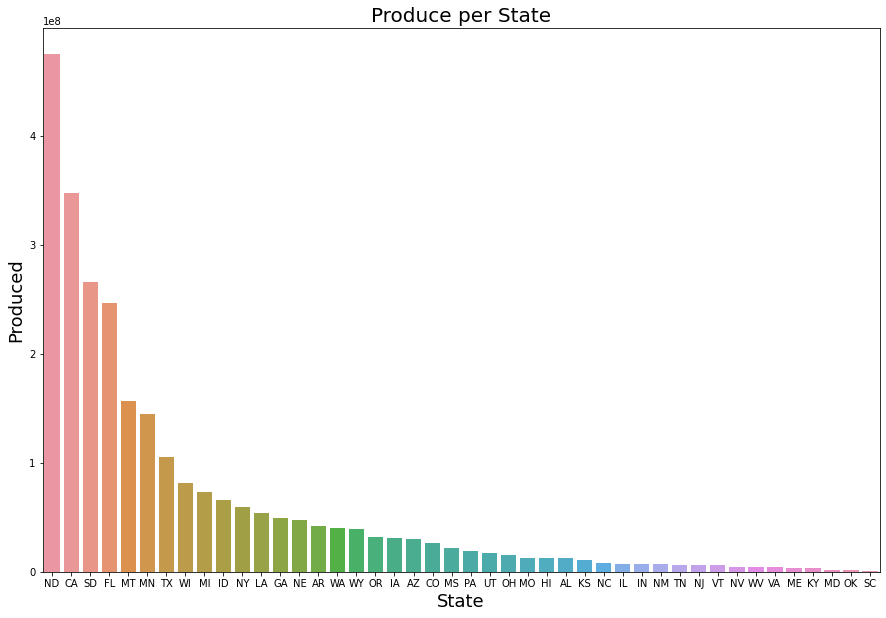

In [27]:
# The produce per state
plt.figure(figsize=(15,10))
sns.barplot(x=state.index,y=state.values) ## Barplot is useful, when we have categories, such as state
plt.title("Produce per State", size=20)
plt.xlabel("State", size=18)
plt.ylabel("Produced", size = 18)
plt.savefig('Produce per State.png')

In [28]:
state1998 = data['totalprod'].groupby(by=data['state'].loc[data['year']==1998], axis=0).sum()
state_1998 = pd.DataFrame({'State_1998':state1998.index,'Total_Produced_1998':state1998.values})
## Grouping the data and creating a dataframe with it!
state_1998.tail(10)

,State_1998,Total_Produced_1998
33,SD,21375000.0
34,TN,448000.0
35,TX,7007000.0
36,UT,1740000.0
37,VA,296000.0
38,VT,384000.0
39,WA,2958000.0
40,WI,8099000.0
41,WV,330000.0
42,WY,2760000.0


In [29]:
state2012 = data['totalprod'].groupby(by=data['state'].loc[data['year']==2012], axis=0).sum() 
state_2012 = pd.DataFrame({'State_2012':state2012.index,'Total_Produced_2012':state2012.values})
## Grouping the data and creating a dataframe with it!
state_2012.tail(10)

,State_2012,Total_Produced_2012
30,SD,16380000.0
31,TN,366000.0
32,TX,4784000.0
33,UT,950000.0
34,VA,164000.0
35,VT,240000.0
36,WA,2542000.0
37,WI,4140000.0
38,WV,288000.0
39,WY,2550000.0


In [30]:
## Checking states in each dataset
print(state_1998['State_1998'].unique())
print(state_2012['State_2012'].unique())

['AL' 'AR' 'AZ' 'CA' 'CO' 'FL' 'GA' 'HI' 'IA' 'ID' 'IL' 'IN' 'KS' 'KY'
 'LA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC' 'ND' 'NE' 'NJ' 'NM' 'NV'
 'NY' 'OH' 'OK' 'OR' 'PA' 'SD' 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV'
 'WY']
['AL' 'AR' 'AZ' 'CA' 'CO' 'FL' 'GA' 'HI' 'IA' 'ID' 'IL' 'IN' 'KS' 'KY'
 'LA' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC' 'ND' 'NE' 'NJ' 'NM' 'NY' 'OH'
 'OR' 'PA' 'SD' 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']


In [31]:
## Adding the missing states to the 2012 dataset with the production value zero
missing = pd.DataFrame({'State_2012':['MD','NV', 'OK'], 'Total_Produced_2012':[0,0,0]})
state_2012 = state_2012.append(missing, ignore_index=True)
state_2012.tail(10)

,State_2012,Total_Produced_2012
33,UT,950000.0
34,VA,164000.0
35,VT,240000.0
36,WA,2542000.0
37,WI,4140000.0
38,WV,288000.0
39,WY,2550000.0
40,MD,0.0
41,NV,0.0
42,OK,0.0


# ● Analyze what effect the declining production trend has had on the value of production

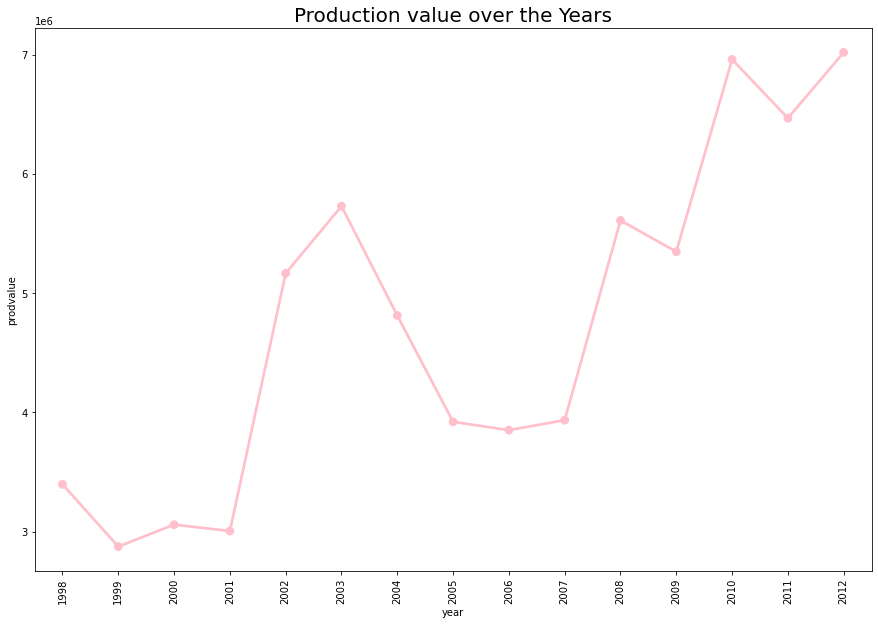

<Figure size 432x288 with 0 Axes>

In [32]:
plt.figure(figsize=(15,10))
plt.title("Production value over the Years", size=20)
sns.pointplot(x="year", y="prodvalue", data=data, ci=None)
plt.xticks(rotation=90) # To rotate the x axis labls
plt.show()
plt.savefig('Production value over the years.png')

___
# -> Observations:
#### 1. The total production has declined over the years, which has led to the value of production per pound has increased over time. 
#### 2. As the supply declined, the demand has added to the value of honey.
___

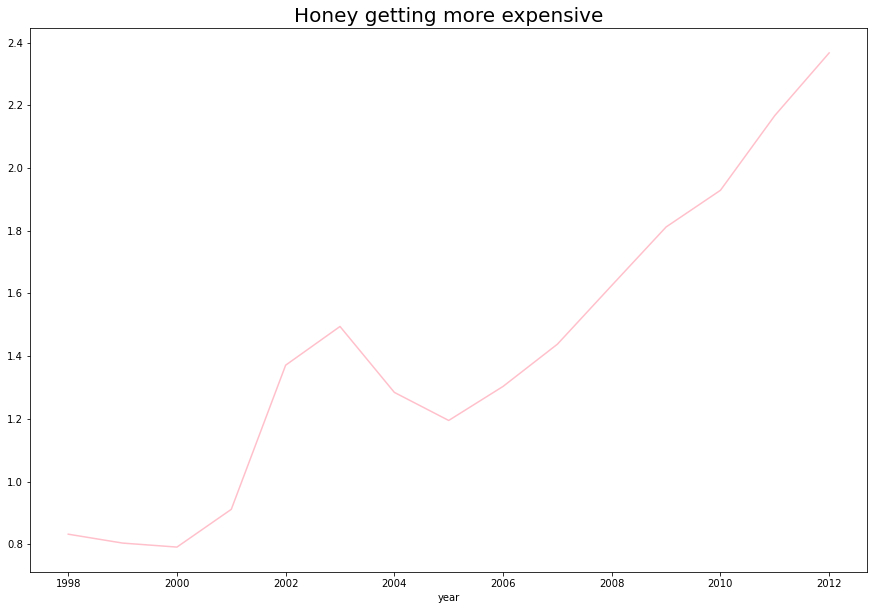

In [33]:
plt.figure(figsize=(15,10))
plt.title("Honey getting more expensive", size=20)
data.groupby("year").priceperlb.mean().plot.line()
plt.savefig('Honey getting more expensive.png')
#Honey getting more expensive 

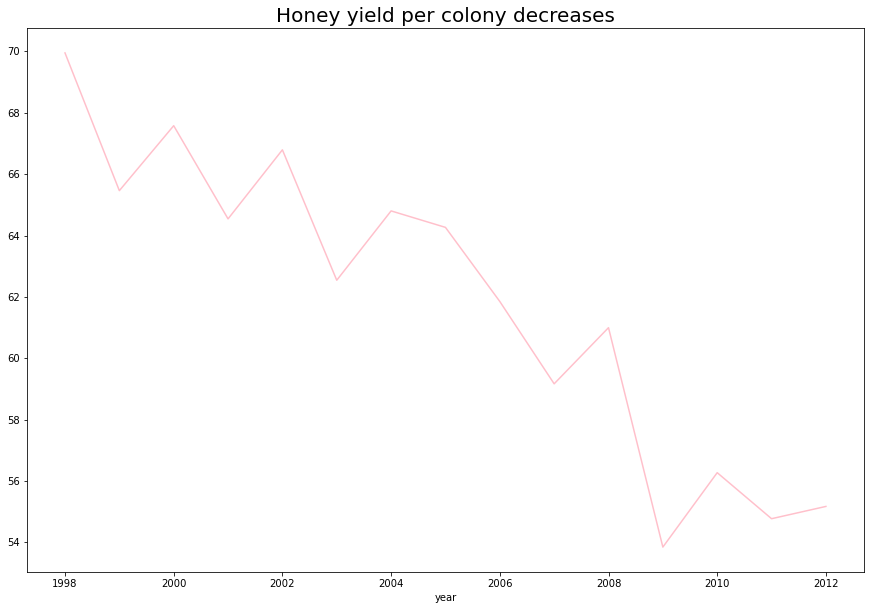

In [34]:
plt.figure(figsize=(15,10))
plt.title("Honey yield per colony decreases", size=20)
data.groupby('year').yieldpercol.mean().plot.line()
plt.savefig('Honey yield per colony decreases.png')
#Honey yield per colony decreases

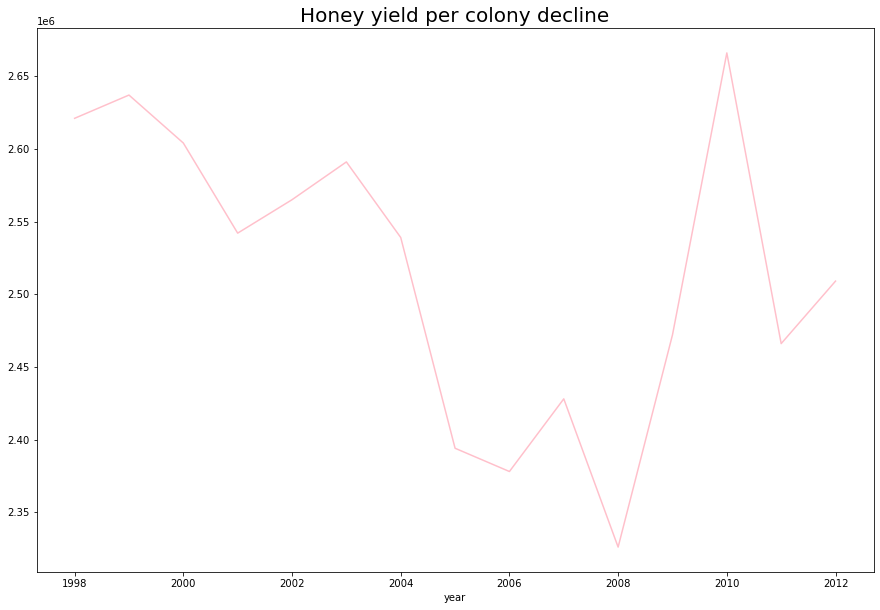

In [35]:
plt.figure(figsize=(15,10))
data.groupby('year').numcol.sum().plot.line()
plt.title("Honey yield per colony decline", size=20)
plt.savefig('Honey yield per colony decline.png')

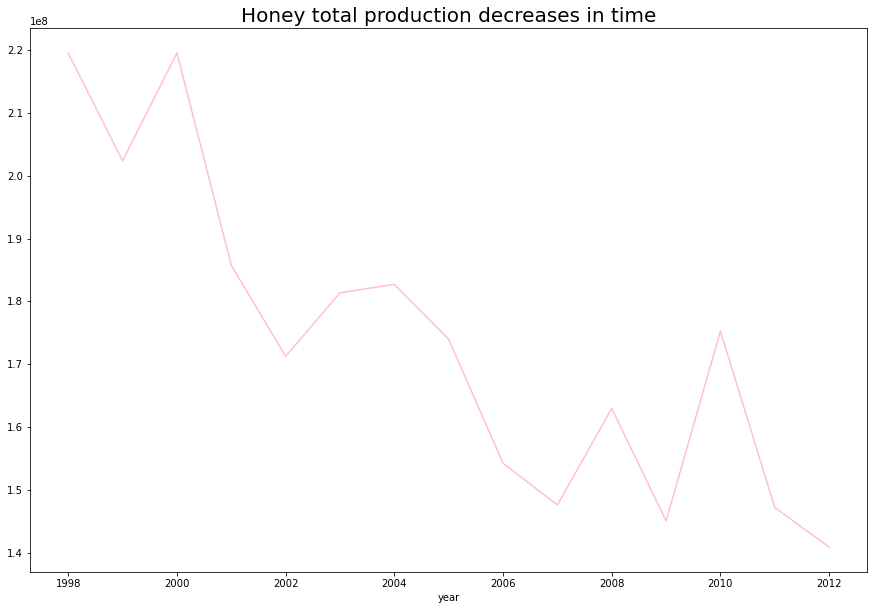

In [36]:
plt.figure(figsize=(15,10))
plt.title("Honey total production decreases in time", size=20)
data.groupby('year').totalprod.sum().plot.line()
plt.savefig('Honey total production decreases in time.png')
#Honey total production decreases in time

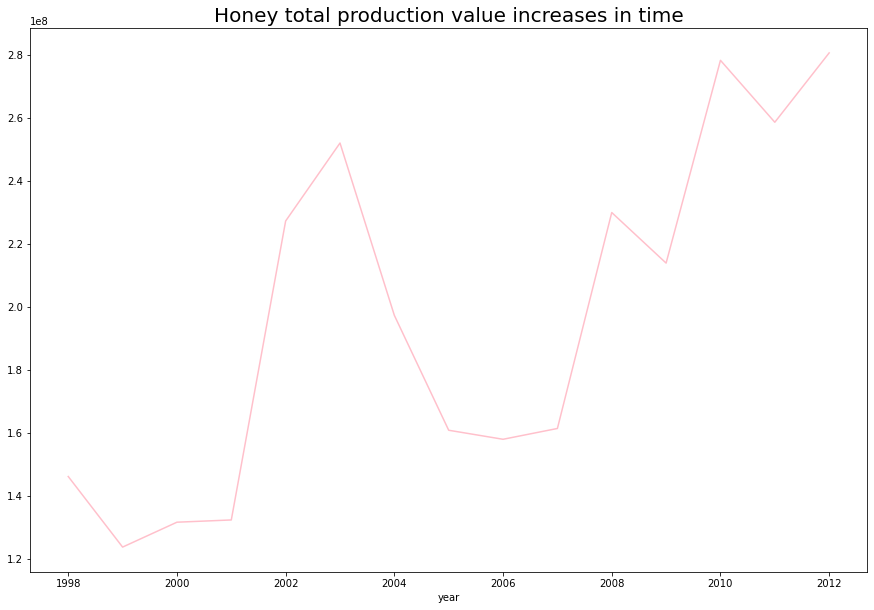

In [37]:
plt.figure(figsize=(15,10))
data.groupby('year').prodvalue.sum().plot.line()
plt.title('Honey total production value increases in time',size=20)
plt.savefig('Honey total production value increases in time.png')
#Honey total production value increases in time

___
# CONCLUSION: 
## 1. It can be concluded from the dataset that the total honey production has declined whereas the value of production has increased for per pound of honey produced. 
## 2. There can be multiple reasons behind this trend, such as decrease in the yeild per colony over the years and decrease in the number of colonies as well.
## 3. The major honey producing states are North Dakota, California, South Dakota, Montana, etc.
## 4. The state of Florida has experienced the best sales relative to the amount of honey produced.
___